# Synthetic Model 

Notebook to generate a set of models.

#### Import libraries

In [1]:
from IPython.display import Markdown as md
from IPython.display import display as dp
import string as st
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, Prism, PolygonalPrism
from fatiando.gravmag import sphere, prism, polyprism

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
notebook_name = 'synthetic_model.ipynb'

#### Importing auxiliary functions

In [3]:
dir_modules = '../../mypackage'
sys.path.append(dir_modules)

In [4]:
import auxiliary_functions as func

#### Loading 2D grid properties

In [5]:
with open('data/regular_grid.pickle') as f:
        regular = pickle.load(f)

In [6]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

#### List of saved files

In [7]:
saved_files = []

### Observation area

In [8]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (regular['area'][1], regular['area'][0],regular['area'][3],regular['area'][2])

Area limits: 
 x_max = 6000.0 m 
 x_min = -6000.0 m 
 y_max = 6000.0 m 
 y_min = -6000.0 m


## Regional Field

In [9]:
inc_gf , dec_gf = (20.,20.) 

## Create a model w/ the presence of Remanence Magnetization 

In [10]:
model_poly_remanent = dict()

#### Vertices of a Polygonal prism

In [11]:
model_poly_remanent['x_verts'] = [1500.,1500.,500.,0.,-1500.,-1500.,1500.]

In [12]:
model_poly_remanent['y_verts'] = [-1500.,0.,500.,2500.,2500.,-1500.,-1500.]

In [13]:
model_poly_remanent['z_top'] = 450.

In [14]:
model_poly_remanent['z_bottom'] = 3000.

In [15]:
model_poly_remanent['verts'] = zip(model_poly_remanent['x_verts'],
                                   model_poly_remanent['y_verts'] )

#### Main field

In [16]:
model_poly_remanent['main_field'] = (inc_gf,dec_gf)

#### Magnetization of a PolyPrism

In [17]:
model_poly_remanent['m'] = 3.
model_poly_remanent['inc'] = 55.
model_poly_remanent['dec'] = 40.

mag_tot_R = ang2vec(model_poly_remanent['m'],
                  model_poly_remanent['inc'],
                  model_poly_remanent['dec'])

model_poly_remanent['magnetization'] = mag_tot_R

In [18]:
model_poly_remanent['magnetization_sph_coord'] = vec2ang(mag_tot_R)

### Creating a polyprism model

In [19]:
model_poly_remanent['model'] = [PolygonalPrism(model_poly_remanent['verts'],
                                              model_poly_remanent['z_top'],
                                              model_poly_remanent['z_bottom'],
                                              {'magnetization':mag_tot_R})]

#### Generating .pickle file

In [20]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
model_poly_remanent['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [21]:
file_name = 'data/model_poly_remanent.pickle'
with open(file_name, 'w') as f:
    pickle.dump(model_poly_remanent, f)
    
saved_files.append(file_name)

In [22]:
for r in model_poly_remanent:
    print r, ':', model_poly_remanent[r]

magnetization_sph_coord : [3.0, 55.0, 40.000000000000007]
dec : 40.0
y_verts : [-1500.0, 0.0, 500.0, 2500.0, 2500.0, -1500.0, -1500.0]
x_verts : [1500.0, 1500.0, 500.0, 0.0, -1500.0, -1500.0, 1500.0]
m : 3.0
main_field : (20.0, 20.0)
metadata : Generated by synthetic_model.ipynb on 01 April 2019 21:21:54 UTC
magnetization : [ 1.31815513  1.10606348  2.45745613]
verts : [(1500.0, -1500.0), (1500.0, 0.0), (500.0, 500.0), (0.0, 2500.0), (-1500.0, 2500.0), (-1500.0, -1500.0), (1500.0, -1500.0)]
model : [<fatiando.mesher.PolygonalPrism object at 0x7f340232b390>]
z_top : 450.0
z_bottom : 3000.0
inc : 55.0


## Create a simple model w/ Induced Magnetization at the pole

In [23]:
model_poly_induced = dict()

### Main field

In [24]:
inc_pole = 90.
dec_pole = 0.

In [25]:
model_poly_induced['main_field'] = (inc_pole,dec_pole)

#### Vertices of a Polygonal prism

In [26]:
model_poly_induced['x_verts'] = [1500.,1500.,500.,0.,-1500.,-1500.,1500.]

In [27]:
model_poly_induced['y_verts'] = [-1500.,0.,500.,2500.,2500.,-1500.,-1500.]

In [28]:
model_poly_induced['z_top'] = 450.

In [29]:
model_poly_induced['z_bottom'] = 3000.

In [30]:
model_poly_induced['verts'] = zip(model_poly_induced['x_verts'],
                                   model_poly_induced['y_verts'] )

### Magnetization direction

In [31]:
model_poly_induced['m'] = 3.
model_poly_induced['inc'] = inc_pole
model_poly_induced['dec'] = dec_pole

mag_tot_I = ang2vec(model_poly_induced['m'],
                    model_poly_induced['inc'],
                    model_poly_induced['dec'])

model_poly_induced['magnetization'] = mag_tot_I

In [32]:
model_poly_induced['magnetization_sph_coord'] = vec2ang(mag_tot_I)

#### Creating the model

In [33]:
model_poly_induced['model'] = [PolygonalPrism(model_poly_induced['verts'],
                                              model_poly_induced['z_top'],
                                              model_poly_induced['z_bottom'],
                                              {'magnetization':mag_tot_I})]

#### Generating a .pickle file

In [34]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
model_poly_induced['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [35]:
file_name = 'data/model_poly_induced.pickle'
with open(file_name, 'w') as f:
    pickle.dump(model_poly_induced, f)
    
saved_files.append(file_name)

In [36]:
for r in model_poly_induced:
    print r, ':', model_poly_induced[r]

magnetization_sph_coord : [3.0, 90.0, 0.0]
dec : 0.0
y_verts : [-1500.0, 0.0, 500.0, 2500.0, 2500.0, -1500.0, -1500.0]
x_verts : [1500.0, 1500.0, 500.0, 0.0, -1500.0, -1500.0, 1500.0]
m : 3.0
main_field : (90.0, 0.0)
metadata : Generated by synthetic_model.ipynb on 01 April 2019 21:21:55 UTC
magnetization : [  1.83697020e-16   0.00000000e+00   3.00000000e+00]
verts : [(1500.0, -1500.0), (1500.0, 0.0), (500.0, 500.0), (0.0, 2500.0), (-1500.0, 2500.0), (-1500.0, -1500.0), (1500.0, -1500.0)]
model : [<fatiando.mesher.PolygonalPrism object at 0x7f340232b450>]
z_top : 450.0
z_bottom : 3000.0
inc : 90.0


## Visualization of prism limits

/home/andrelreis/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


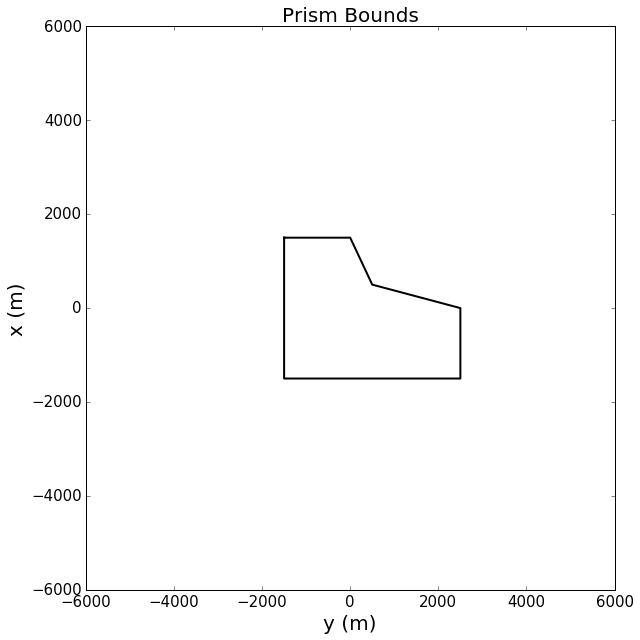

In [37]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.title('Prism Bounds',fontsize=title_font)
plt.plot(model_poly_remanent['y_verts'], model_poly_remanent['x_verts'],
         color='k',linestyle='-',linewidth=2)
#plt.plot(airborne['y'], airborne['x'],'k.')
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.ylim(np.min(regular['x']),np.max(regular['x']))
plt.xlim(np.min(regular['y']),np.max(regular['y']))
plt.tick_params(labelsize=15)

file_name = 'figs/prism_bound'
plt.savefig(file_name+'.png',dpi=200)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=200)
saved_files.append(file_name+'.eps')


plt.show()

## 3D visualization

In [38]:
x_verts = 1e-3*np.array(model_poly_remanent['x_verts'])
y_verts = 1e-3*np.array(model_poly_remanent['y_verts'])
z_top = 1e-3*model_poly_remanent['z_top']*np.ones_like(model_poly_remanent['x_verts'])
z_bottom = 1e-3*model_poly_remanent['z_bottom']*np.ones_like(model_poly_remanent['x_verts'])

In [39]:
x_max = 1e-3*6000.0  
x_min = -1e-3*6000.0  
y_max = 1e-3*6000.0 
y_min = -1e-3*6000.0

In [40]:
verts_c = [list(zip(x_verts,y_verts,z_top)),
           list(zip(x_verts,y_verts,z_bottom))]

In [41]:
verts_s = []
for i,j in zip(x_verts,y_verts):
    verts_s.append([(i,j,z_top[0]),(i,j,z_bottom[0])])   

<IPython.core.display.Javascript object>


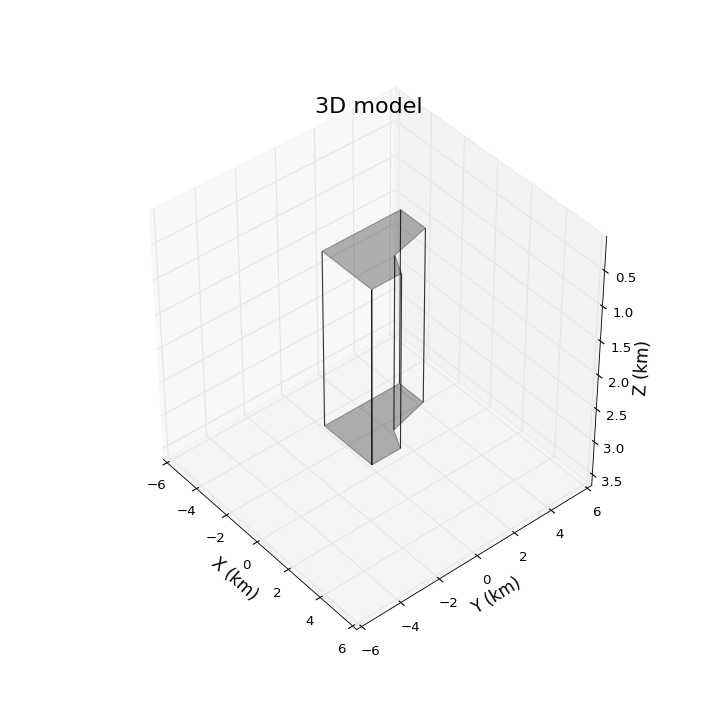

In [42]:
% matplotlib notebook

fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')

ax.set_title('3D model',fontsize=title_font,loc='center')
cover = Poly3DCollection(verts_c,facecolors='black', linewidths=1, alpha=.9,edgecolors='k')
sides = Poly3DCollection(verts_s,facecolors='black', linewidths=1, alpha=.9,edgecolors='k')

cover.set_alpha(.3)
ax.add_collection3d(cover)
sides.set_alpha(.8)
ax.add_collection3d(sides)

ax.set_xlabel('X (km)',fontsize=15)
ax.set_xlim3d(x_min, x_max,100)
ax.set_ylabel('Y (km)',fontsize=15)
ax.set_ylim3d(y_min, y_max,100)
ax.set_zlabel('Z (km)',fontsize=15)
ax.set_zlim3d(1.2*z_bottom[0], 1e-3*100.)
ax.set_xticks(np.linspace(x_min, x_max, 5), minor=True)
ax.set_yticks(np.linspace(y_min, y_max, 5), minor=True)
ax.set_zticks(np.linspace(1.2*z_bottom[0], 1e-3*100., 6), minor=True)
ax.view_init(40,320)

file_name = 'figs/3D_prism'
plt.savefig(file_name+'.png',dpi=200)
saved_files.append(file_name+'.png')

plt.show()

#### Saved files

In [43]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  data/model_poly_remanent.pickle
2  data/model_poly_induced.pickle
3  figs/prism_bound.png
4  figs/prism_bound.eps
5  figs/3D_prism.png
